In [1]:
"""
What? Stacked LSTM

The Stacked LSTM is a model that has multiple hidden LSTM layers where each layer contains multiple memory cells. 
We will refer to it as a Stacked LSTM here to di↵erentiate it from the unstacked LSTM (Vanilla LSTM).


https://machinelearningmastery.com/stacked-long-short-term-memory-networks/
"""

'\nWhat? Stacked LSTM\n\nThe Stacked LSTM is a model that has multiple hidden LSTM layers where each layer contains multiple memory cells. \nWe will refer to it as a Stacked LSTM here to di↵erentiate it from the unstacked LSTM (Vanilla LSTM).\n\nDate: 08/01/21\nReference: Long short-term memory networks with python, Jason Brownlee\nGLM\n'

In [14]:
# Import python modules
from math import pi, exp, sin
from matplotlib import pyplot
from random import random
from random import randint
from random import uniform
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

### Damped Sine Wave Prediction Problem

In [3]:
"""
This section describes and implements the damped sine wave prediction problem. This section is divided into the 
following parts:
1. Sine Wave.
2. Damped Sine Wave.
3. Random Damped Sine Waves.
4. Sequences of Damped Sine Waves.

We can see that the sine wave sequence has the properties that it varies over time with upward and downward movement.
This is good local movement that a VANILLA LSTM can model. An LSTM could memorize the sequence or it can use the last
few time steps to predict the next time step.
"""

'\nThis section describes and implements the damped sine wave prediction problem. This section is divided into the \nfollowing parts:\n1. Sine Wave.\n2. Damped Sine Wave.\n3. Random Damped Sine Waves.\n4. Sequences of Damped Sine Waves.\n\nWe can see that the sine wave sequence has the properties that it varies over time with upward and downward movement.\nThis is good local movement that a VANILLA LSTM can model. An LSTM could memorize the sequence or it can use the last\nfew time steps to predict the next time step.\n'

### Sine Wave

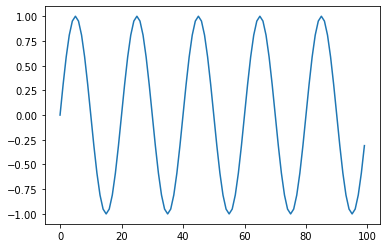

In [4]:
# create sequence
length = 100
freq = 5
sequence = [sin(2 * pi * freq * (i/length)) for i in range(length)]
# plot sequence
pyplot.plot(sequence)
pyplot.show()

### Damped Sine Wave

In [5]:
"""
There is a type of sine wave that decreases with time. The decrease in amplitude provides an additional longer term
movement that may require an additional level of abstraction in the LSTM to learn
"""

'\nThere is a type of sine wave that decreases with time. The decrease in amplitude provides an additional longer term\nmovement that may require an additional level of abstraction in the LSTM to learn\n'

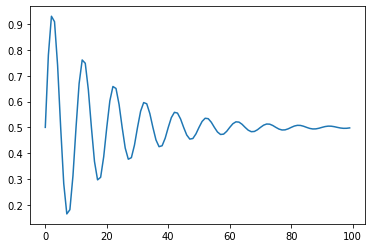

In [6]:
# create sequence
length = 100
period = 10
decay = 0.05
sequence = [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]
# plot sequence
pyplot.plot(sequence)
pyplot.show()   

### Random Damped Sine Waves

In [7]:
"""
We can generate sequences of damped sine waves with different periods and decay values, withhold the last few
points of the series, and have the model predict them.
"""

'\nWe can generate sequences of damped sine waves with di↵erent periods and decay values, withhold the last few\npoints of the series, and have the model predict them.\n'

In [8]:
# generate damped sine wave in [0,1]
def generate_sequence(length, period, decay):
    return [0.5 + 0.5 * sin(2 * pi * i / period) * exp(-decay * i) for i in range(length)]

### Sequences of Damped Sine Waves

In [9]:
"""
We will split out the last n time steps of each sequence and use that as the output sequence to be predicted. 
We will make this configurable along with the number of sequences to generate and the length of the sequences.
The function below named generate examples() implements this and returns an array of input and output examples 
ready for training or evaluating an LSTM.
"""

'\nWe will split out the last n time steps of each sequence and use that as the output sequence to be predicted. \nWe will make this configurable along with the number of sequences to generate and the length of the sequences.\nThe function below named generate examples() implements this and returns an array of input and output examples \nready for training or evaluating an LSTM.\n'

In [10]:
# generate input and output pairs of damped sine waves
def generate_examples(length, n_patterns, output):
    X, y = list(), list()
    for _ in range(n_patterns):
        p = randint(10, 20)
        d = uniform(0.01, 0.1)
        sequence = generate_sequence(length + output, p, d)
        X.append(sequence[:-output])
        y.append(sequence[-output:])
    X = array(X).reshape(n_patterns, length, 1)
    y = array(y).reshape(n_patterns, output)
    return X, y

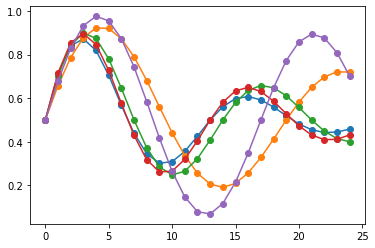

In [12]:
# test problem generation
X, y = generate_examples(20, 5, 5)
for i in range(len(X)):
    pyplot.plot([x for x in X[i, :, 0]] + [x for x in y[i]],  "-o" )
pyplot.show()

In [ ]:
"""
This is a regression type sequence prediction problem. It may also be considered a time series forecasting regression
problem. In time series forecasting, it is good practice to make the series stationary, that is remove any systematic
trends and seasonality from the series before modeling the problem. This is recommended when working with LSTMs. We 
are intentionally not making the series stationary in this lesson to demonstrate the capability of the Stacked LSTM.
"""

### Define and Compile the Model

In [ ]:
"""
We will define a Stacked LSTM with two hidden LSTM layers. Each LSTM layer will have 20 memory cells. The input 
dimension will be 1 feature with 20 time steps. The output dimension of the model will be a vector of 5 values 
that we will interpret to be 5 time steps. The output layer will use the linear activation function, which is 
the default used when no function is specified. This model configuration, specifically the use of 2 layers and
the use of 20 cells per layer, was chosen after a little trial and error. The model configuration is competent,
but by no means tuned for this problem
"""

In [15]:
# configure problem
length = 50
output = 5
# define model
model = Sequential()
model.add(LSTM(20, return_sequences=True, input_shape=(length, 1)))
model.add(LSTM(20))
model.add(Dense(output))
model.compile(loss = "mae" , optimizer = "adam")
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 20)            1760      
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dense (Dense)                (None, 5)                 105       
Total params: 5,145
Trainable params: 5,145
Non-trainable params: 0
_________________________________________________________________
None


### Fit the Model

In [ ]:
"""
We can now fit the model on a dataset of randomly generated examples of damped sine waves. The model is expected 
to generalize a solution to predicting the last few time steps of a damped sine wave time series.
"""

In [16]:
# fit model
X, y = generate_examples(length, 10000, output)
model.fit(X, y, batch_size=10, epochs=1)

1000/1000 [==============================] - 22s 22ms/step - loss: 0.0370


### Evaluate the Model

In [ ]:
"""
Once the model is fit, we can evaluate it. Here, we generate a new set of 1,000 random sequences and report the 
Mean Absolute Error (MAE). This is good for comparing models and model configurations by their skill, but it is 
hard to get an idea of what is going on.
"""

In [19]:
# evaluate model
X, y = generate_examples(length, 1000, output)
loss = model.evaluate(X, y, verbose=0)
print("MAE: %f"  % loss)

MAE: 0.027429


### Make Predictions with the Model

In [ ]:
"""
We can get a better idea of how skillful the model is by generating a standalone prediction and plotting it against
the expected output sequence.
"""

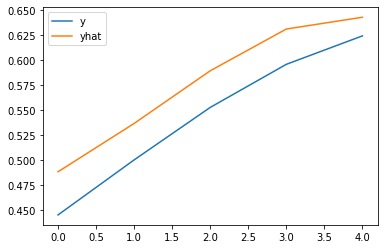

In [23]:
# prediction on new data
X, y = generate_examples(length, 1, output)
yhat = model.predict(X, verbose=0)
pyplot.plot(y[0], label= "y" )
pyplot.plot(yhat[0], label= "yhat" )
pyplot.legend()
pyplot.show()